In [3]:
#importing Libraries
import pandas as pd
import numpy as np
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as si
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import scale 
from collections import Counter

In [7]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv').set_index('date')

In [8]:
df.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,122.0,29.524590,2.167426,23.0,28.0,30.0,31.0,37.0
MaxTemp,122.0,32.418033,2.292064,26.0,31.0,33.0,34.0,36.0
MinTemp,122.0,26.475410,2.912535,20.0,25.0,27.0,28.0,38.0
meantempm_1,122.0,28.680328,2.238899,24.0,27.0,29.0,30.0,33.0
maxdew,122.0,24.573770,1.360105,21.0,24.0,25.0,26.0,26.0
mindew,122.0,21.909836,1.342282,20.0,21.0,22.0,23.0,24.0


In [13]:
df.info

<bound method DataFrame.info of            meantempm  MaxTemp  MinTemp  meantempm_1 meanhumidity maxhumidity  \
date                                                                           
01-Apr-19         27       33       21           26          60%         90%   
02-Apr-19         26       29       22           25          62%         76%   
03-Apr-19         29       34       24           30          61%         87%   
04-Apr-19         28       33       23           29       59.50%         75%   
05-Apr-19         29       34       24           28          61%         85%   
06-Apr-19         27       31       23           26       73.50%         91%   
07-Apr-19         27       32       23           30       71.50%         93%   
08-Apr-19         28       33       23           31       69.50%         95%   
09-Apr-19         31       33       28           29       53.50%         67%   
10-Apr-19         31       33       28           30          50%         62%   
11-Apr-1

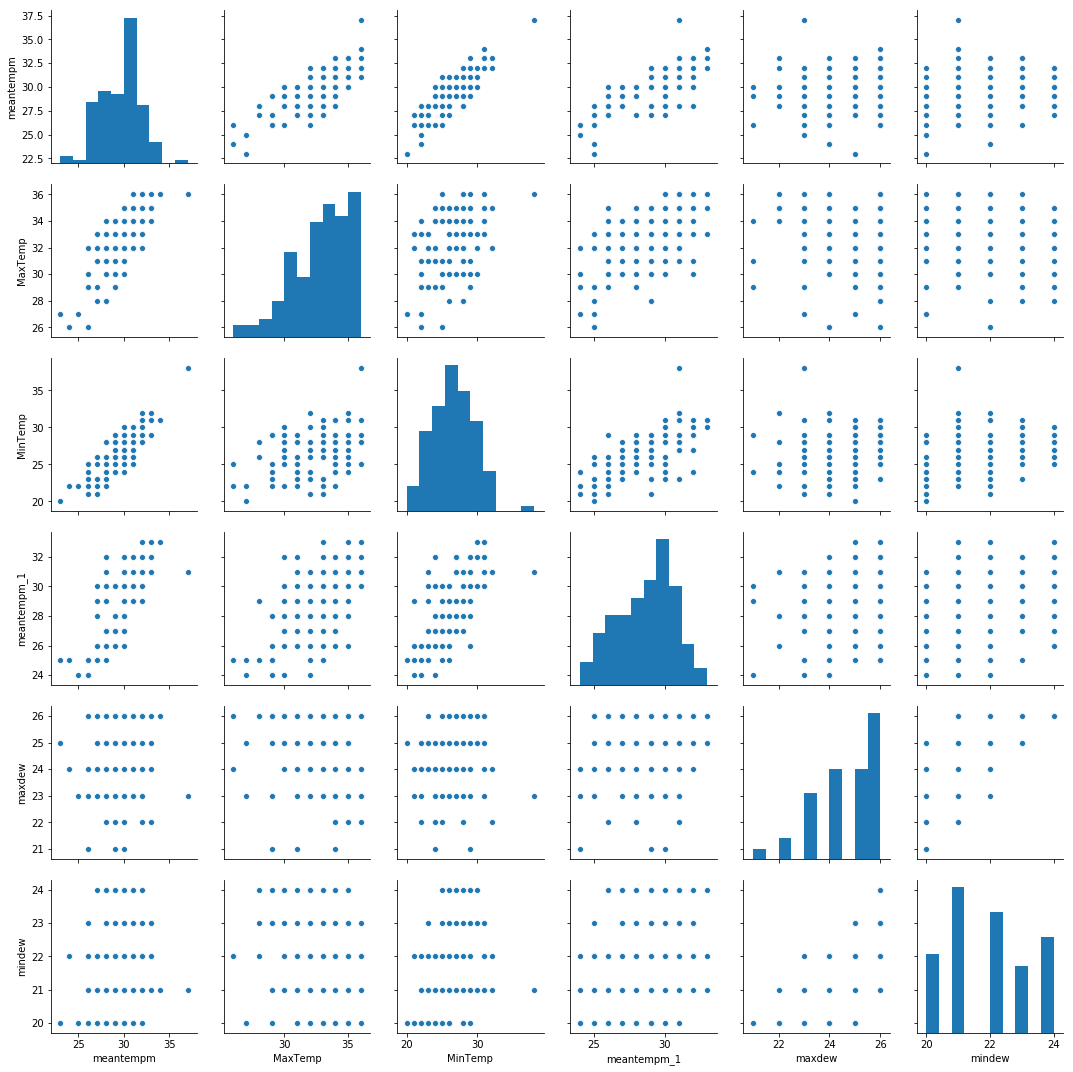

In [15]:
si.pairplot(df)

In [18]:
df.shape

(122, 15)

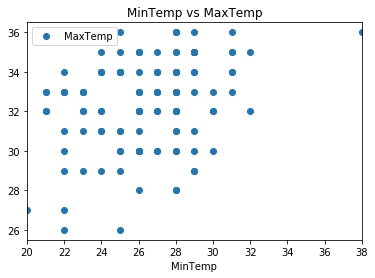

In [19]:
df.plot(x='MinTemp',y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel=('MinTemp')
plt.ylabel=('MaxTemp')
plt.show()

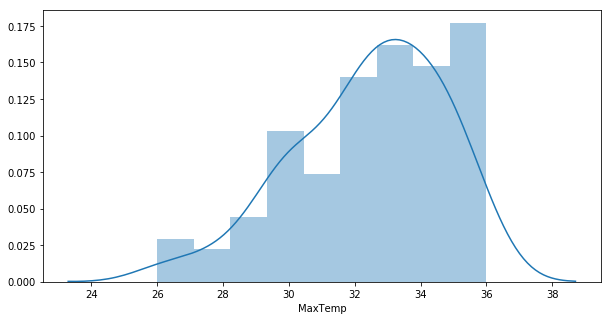

In [20]:
plt.figure(figsize=(10,5))
plt.tight_layout
si.distplot (df['MaxTemp'])

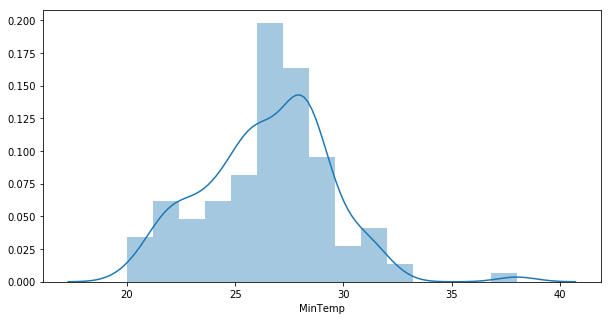

In [21]:
plt.figure(figsize=(10,5))
plt.tight_layout
si.distplot (df['MinTemp'])

In [23]:
X= df['MinTemp'].values.reshape(-1,1)
Y= df['MaxTemp'].values.reshape(-1,1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size=0.2, random_state=0)

In [25]:
regression_model =LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print("Intercept:", regression_model.intercept_ )
print ("Slope:", regression_model.coef_)

Intercept: [24.3013433]
Slope: [[0.30727508]]


In [27]:
#prediction
predict= regression_model.predict(x_test)
df_predict= pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predict.flatten()})
df_predict

,Actual,Predicted
0,36,33.212321
1,30,32.597770
2,33,31.368670
3,29,33.212321
4,33,32.905045
5,30,31.061395
6,35,31.675945
7,33,31.368670
8,32,32.290495
9,34,32.905045


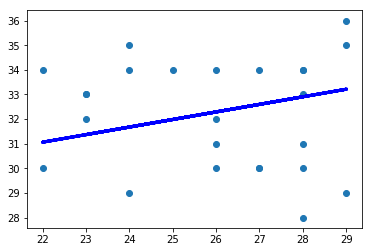

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predict, color='blue', linewidth='3')
plt.show()

In [29]:
print("RMS ERROR IN THE PREDICTED WEATHER:" ,np.sqrt(metrics.mean_squared_error(y_test,predict)))

RMS ERROR IN THE PREDICTED WEATHER: 2.330568176156873
